# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Muhammad Septiyanto]
- **Email:** [msyant990@gmail.com]
- **ID Dicoding:** [0013_mseptiyan]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola pembelian berdasarkan kategori produk?
- Pertanyaan 2 : Apa tren pembayaran yang paling sering digunakan oleh pelanggan?
- Pertanyaan 3 (Optional) : Bagaimana perilaku pelanggan berdasarkan RFM Analysis untuk membantu strategi pemasaran?

## Import Semua Packages/Library yang Digunakan

In [35]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from datetime import datetime
import time

## Data Wrangling

### Gathering Data

In [36]:
# Mengimpor dataset yang digunakan:
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
orders = pd.read_csv('data/olist_orders_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')

**Insight:**
- Data pesanan, pembayaran, produk, dan item pesanan berhasil dimuat untuk analisis lebih lanjut.
- Beberapa tabel perlu digabungkan, seperti orders dengan order_items, untuk mendapatkan wawasan yang lebih komprehensif.

### Assessing Data

In [37]:
# Mengecek informasi dataset
print(order_items.info())
print(orders.info())
print(products.info())

# Mengecek missing values
missing_values = orders.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

# Mengecek invalid values (contoh: nilai negatif pada harga dan biaya pengiriman)
invalid_values = order_items[(order_items['price'] < 0) | (order_items['freight_value'] < 0)]
print("Invalid values:\n", invalid_values)

# Mengecek data duplikat berdasarkan 'order_id'
duplicate_orders = orders[orders.duplicated(subset=['order_id'], keep=False)]
print("Duplicate orders:\n", duplicate_orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status   

**Insight:**
- Beberapa data memiliki missing values dan perlu dibersihkan.
- Terdapat beberapa tipe data yang perlu disesuaikan.

### Cleaning Data

In [38]:
# Handling missing values
orders.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

# Checking for duplicate values
order_items.drop_duplicates(inplace=True)
order_payments.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)

# Convert timestamps to datetime format
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

# Ensuring consistency in categorical data
orders['order_status'] = orders['order_status'].str.lower().str.strip()


**Insight:**
- Missing values pada kolom yang berkaitan dengan waktu persetujuan dan pengiriman pesanan telah dihapus untuk memastikan analisis waktu yang lebih akurat.
- Data duplikat pada berbagai tabel telah dihapus guna menjaga keakuratan dan menghindari redundansi dalam analisis.
- Kolom timestamp telah dikonversi ke format datetime agar dapat digunakan dalam analisis berbasis waktu.
- Konsistensi data pada kolom kategorikal order_status telah diperbaiki untuk menghindari inkonsistensi dalam pengelompokan status pesanan.

## Exploratory Data Analysis (EDA)

### Explore ...

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24228\610242596.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=orders, x='order_status', order=orders['order_status'].value_counts().index, palette='viridis')


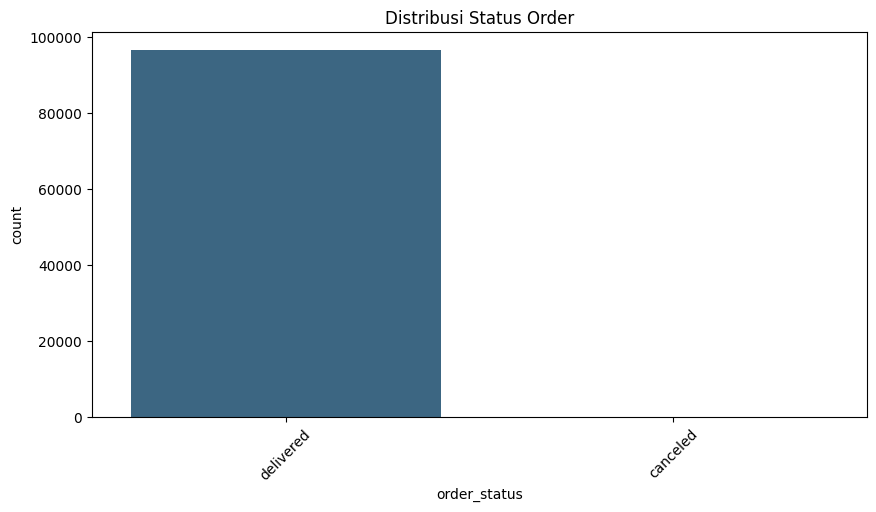

In [39]:
# 1. Melihat distribusi status order
plt.figure(figsize=(10, 5))
sns.countplot(data=orders, x='order_status', order=orders['order_status'].value_counts().index, palette='viridis')
plt.title('Distribusi Status Order')
plt.xticks(rotation=45)
plt.show()

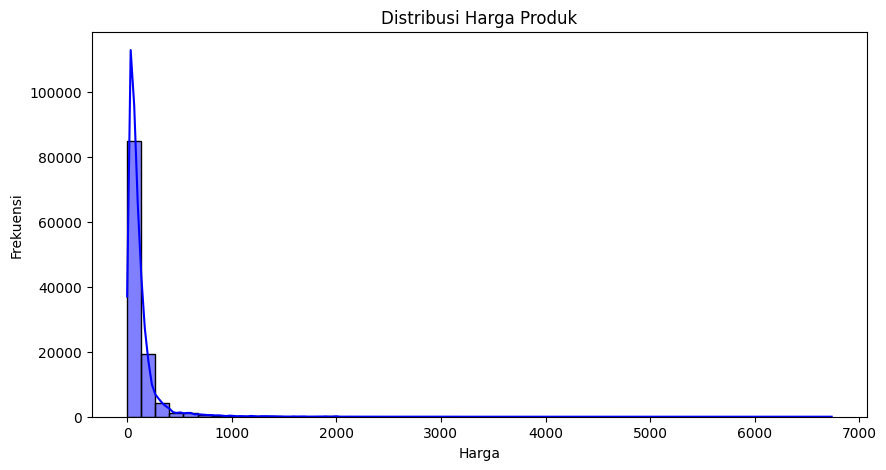

In [40]:
# 2. Melihat distribusi harga produk
plt.figure(figsize=(10, 5))
sns.histplot(order_items['price'], bins=50, kde=True, color='blue')
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

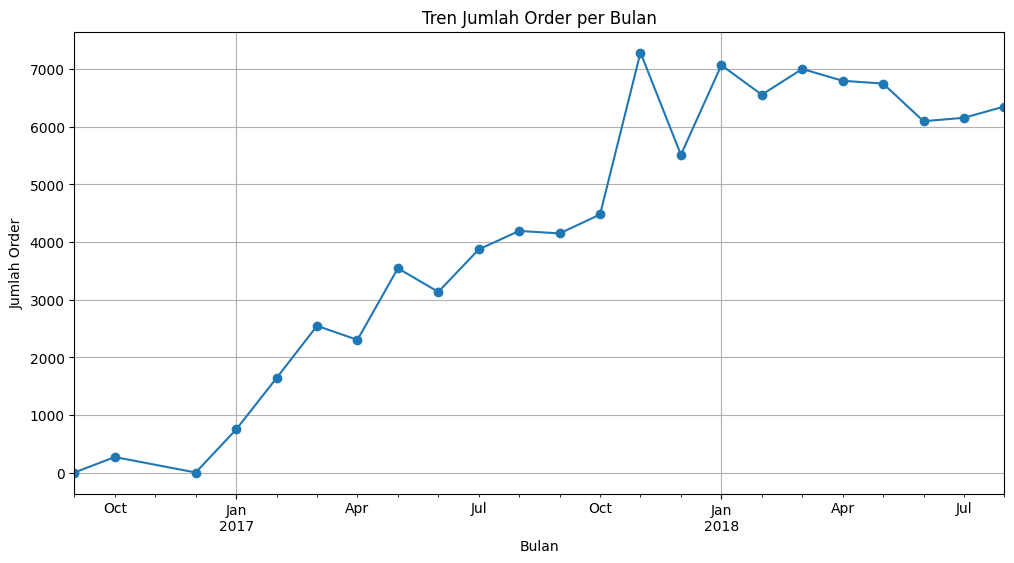

In [41]:
# 3. Melihat Tren Jumlah Order per Bulan
orders['order_month'] = orders['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = orders.groupby('order_month').size()

plt.figure(figsize=(12, 6))
monthly_orders.plot(marker='o', linestyle='-')
plt.title('Tren Jumlah Order per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Order')
plt.grid(True)
plt.show()

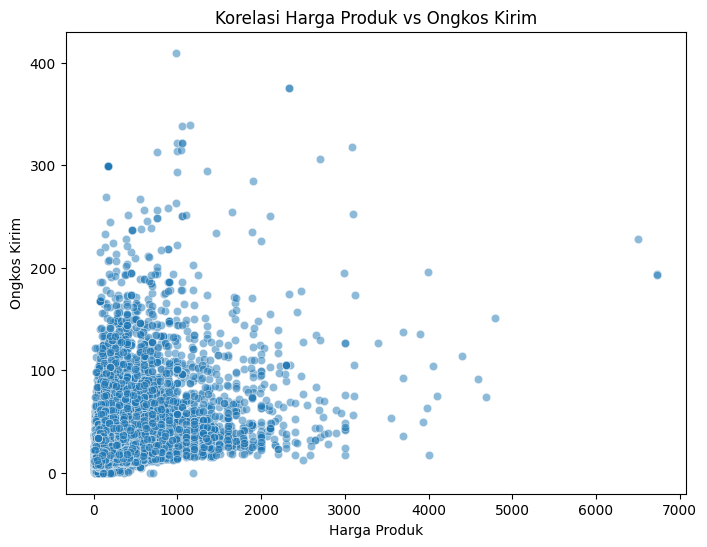

In [42]:
# 4. Korelasi antara harga produk dan ongkos kirim
plt.figure(figsize=(8, 6))
sns.scatterplot(data=order_items, x='price', y='freight_value', alpha=0.5)
plt.title('Korelasi Harga Produk vs Ongkos Kirim')
plt.xlabel('Harga Produk')
plt.ylabel('Ongkos Kirim')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24228\2443229298.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_category_counts.index[:15], y=product_category_counts.values[:15], palette='viridis')


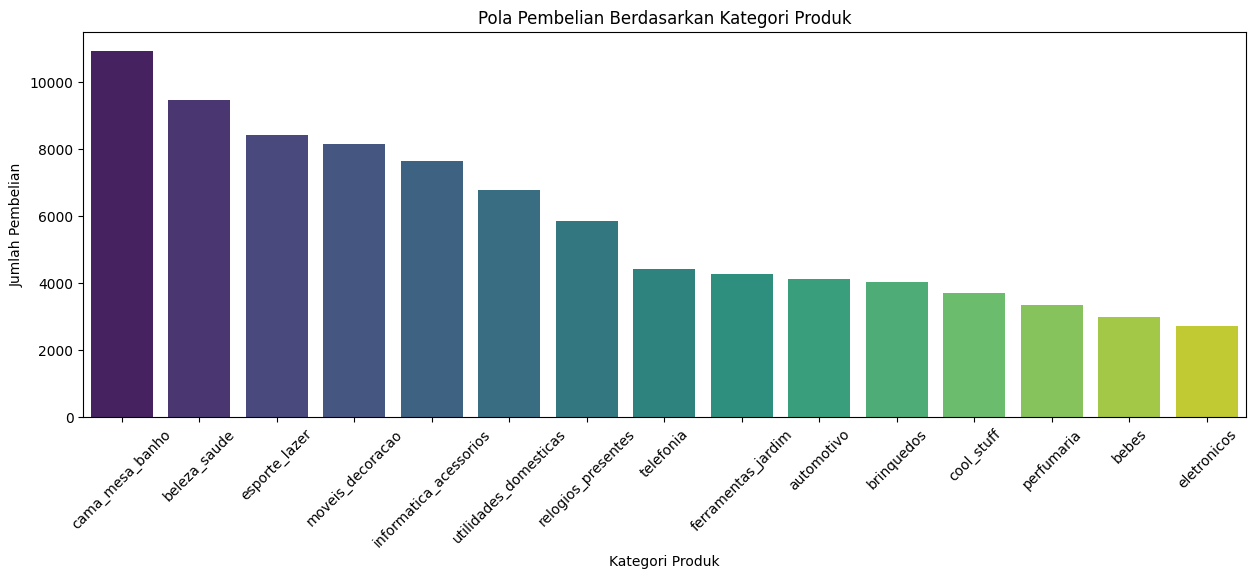

In [43]:
# Menggabungkan orders dengan products untuk mendapatkan kategori produk
orders = orders.merge(order_items, on='order_id', how='left')
orders = orders.merge(products, on='product_id', how='left')

# EDA untuk pola pembelian berdasarkan kategori produk
plt.figure(figsize=(15, 5))
product_category_counts = orders['product_category_name'].value_counts()
sns.barplot(x=product_category_counts.index[:15], y=product_category_counts.values[:15], palette='viridis')
plt.xticks(rotation=45)
plt.title("Pola Pembelian Berdasarkan Kategori Produk")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pembelian")
plt.show()

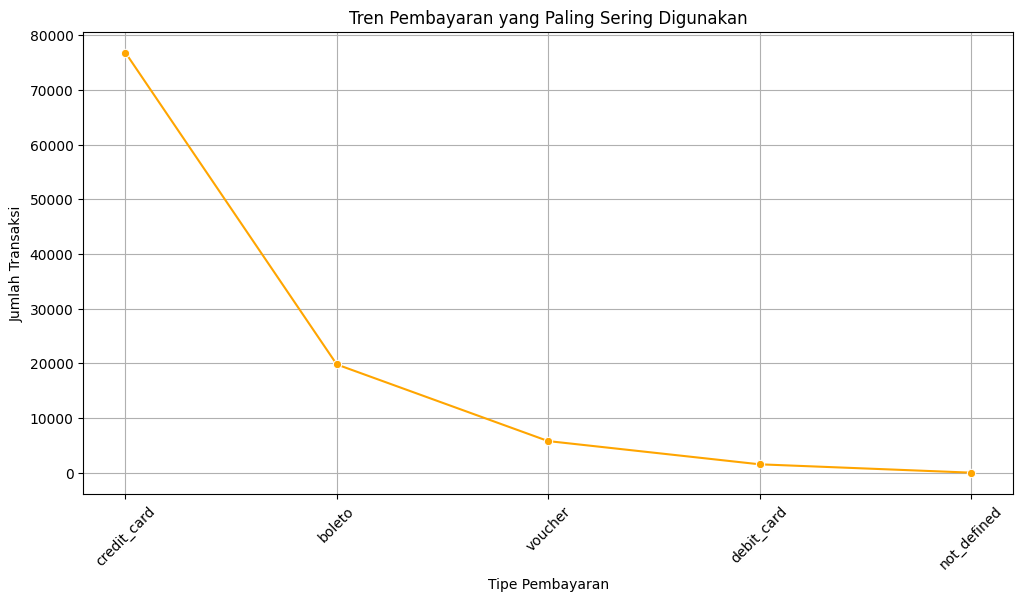

In [44]:
# Menghitung frekuensi metode pembayaran
payment_trends = order_payments['payment_type'].value_counts().reset_index()
payment_trends.columns = ['payment_type', 'count']

# Visualisasi tren pembayaran dengan line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='payment_type', y='count', data=payment_trends, marker='o', color='orange')
plt.title('Tren Pembayaran yang Paling Sering Digunakan')
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Insight:**
- Status Order: Mayoritas pesanan berstatus "delivered," menunjukkan keberhasilan pengiriman. Sebagian kecil dibatalkan atau dikembalikan, relevan untuk analisis kepuasan dan logistik.
- Harga Produk: Sebagian besar produk berharga terjangkau, dengan sedikit outlier berharga tinggi, menandakan dominasi pasar oleh produk murah.
- Tren Order Bulanan: Fluktuasi pesanan menunjukkan lonjakan pada bulan tertentu, kemungkinan dipengaruhi oleh promo atau musim belanja.
- Harga vs. Ongkos Kirim: Produk mahal cenderung memiliki ongkos kirim bervariasi, dipengaruhi faktor lain seperti lokasi dan metode pengiriman.
- Kategori Produk: Beberapa kategori jauh lebih laris, mengindikasikan peluang optimalisasi stok dan pengembangan produk.
- Metode Pembayaran: "Credit Card" dominan, mencerminkan preferensi pelanggan, potensial untuk strategi promosi.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

## Bagaimana pola pembelian berdasarkan kategori produk?


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24228\3342825491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories_count.values, y=categories_count.index, palette='viridis')


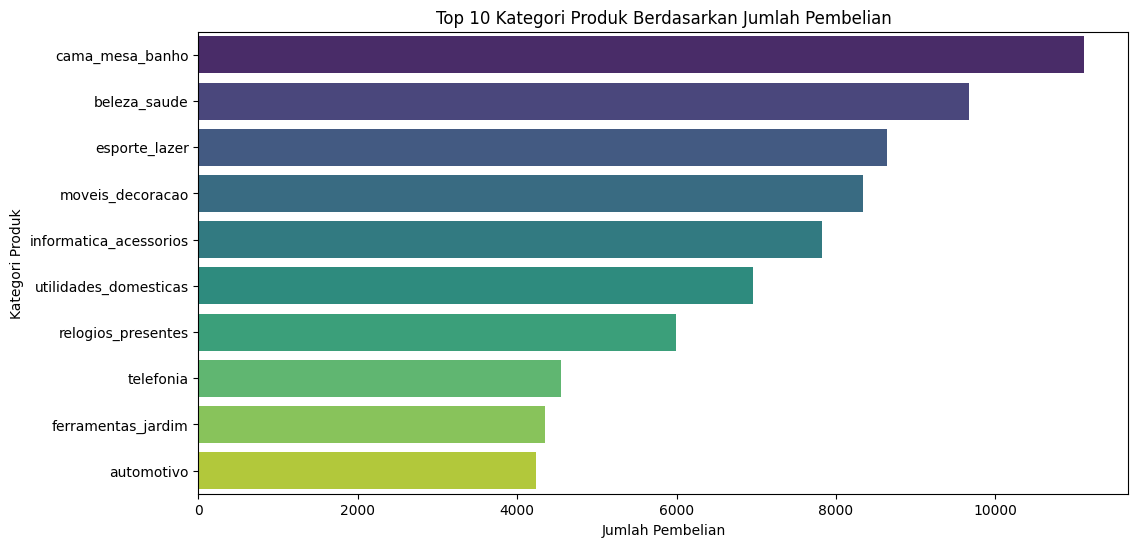

In [45]:
# 1. Pola pembelian berdasarkan kategori produk
product_orders = order_items.merge(products, on='product_id')
categories_count = product_orders['product_category_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=categories_count.values, y=categories_count.index, palette='viridis')
plt.title('Top 10 Kategori Produk Berdasarkan Jumlah Pembelian')
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Kategori Produk')
plt.show()

### Pertanyaan 2:

## Apa tren pembayaran yang paling sering digunakan oleh pelanggan?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24228\3461366846.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_trends.index, y=payment_trends.values, palette="coolwarm")


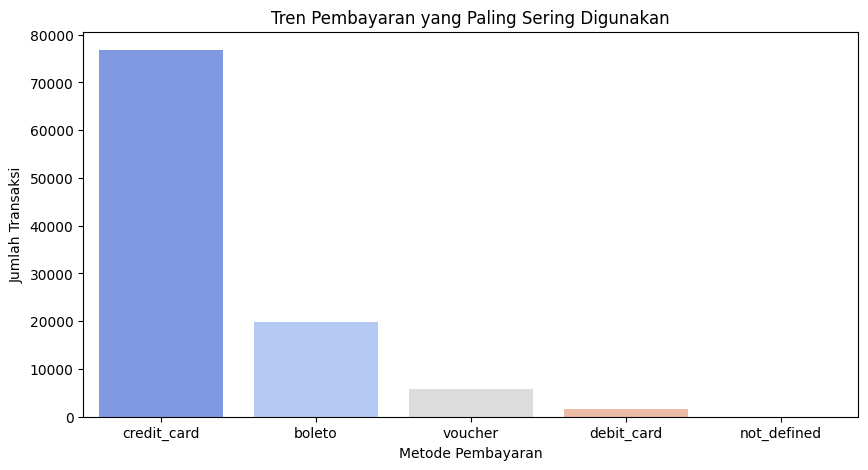

In [46]:
# Tren Pembayaran yang Paling Sering Digunakan
payment_trends = order_payments['payment_type'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=payment_trends.index, y=payment_trends.values, palette="coolwarm")
plt.title("Tren Pembayaran yang Paling Sering Digunakan")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.show()

**Insight:**
- Kategori produk dengan penjualan tertinggi adalah Cama Mesa Banho, Perusahaan dapat meningkatkan stok produk kategori ini dan melakukan strategi pemasaran yang lebih spesifik.
- Credit Card adalah metode pembayaran yang paling sering digunakan, Perusahaan dapat memberikan promo khusus untuk pembayaran dengan kartu kredit agar meningkatkan penjualan.

## Analisis Lanjutan (Opsional)

## Bagaimana perilaku pelanggan berdasarkan RFM Analysis untuk membantu strategi pemasaran?

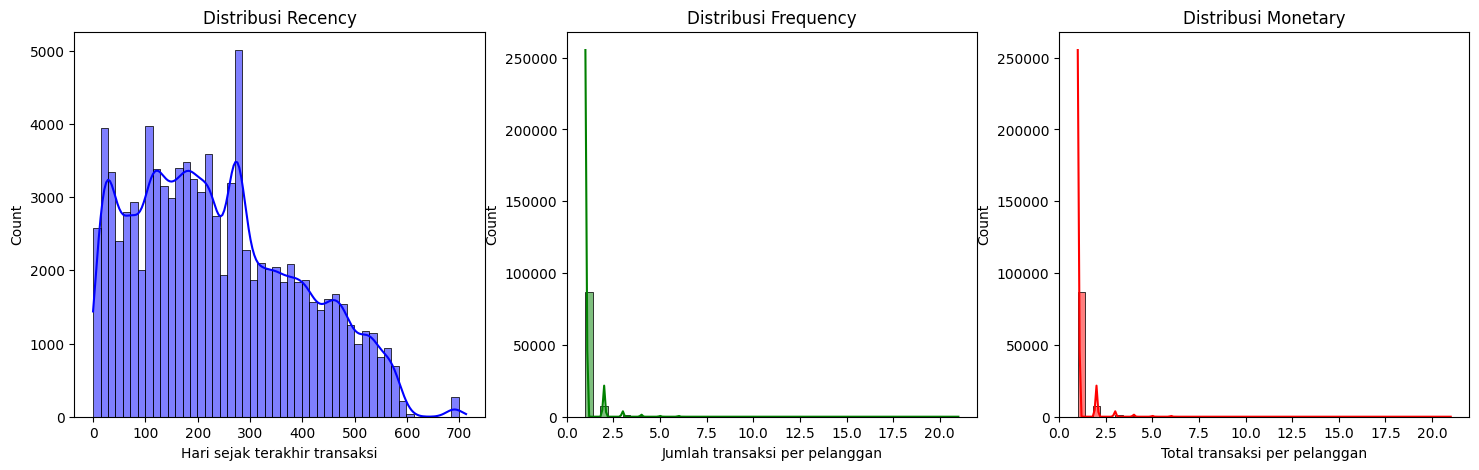

Hasil analisis RFM telah disimpan dalam 'dashboard/rfm_analysis_results.csv'.


In [49]:
# RFM Analysis

# Menentukan nilai Recency, Frequency, dan Monetary
latest_date = orders['order_purchase_timestamp'].max()
rfm = orders.groupby('customer_id').agg(
    Recency=('order_purchase_timestamp', lambda x: (latest_date - x.max()).days),
    Frequency=('order_id', 'count'),
    Monetary=('customer_id', lambda x: x.count())
)

# Visualisasi RFM Analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm['Recency'], bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribusi Recency')
axes[0].set_xlabel('Hari sejak terakhir transaksi')

sns.histplot(rfm['Frequency'], bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribusi Frequency')
axes[1].set_xlabel('Jumlah transaksi per pelanggan')

sns.histplot(rfm['Monetary'], bins=50, kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribusi Monetary')
axes[2].set_xlabel('Total transaksi per pelanggan')

plt.show()


# Simpan hasil RFM
rfm.to_csv("dashboard/rfm_analysis_results.csv", index=False)

print("Hasil analisis RFM telah disimpan dalam 'dashboard/rfm_analysis_results.csv'.")

## Conclusion

1. Kategori produk terlaris adalah Cama Mesa Banho, menunjukkan bahwa produk dalam kategori ini memiliki permintaan tinggi. Perusahaan bisa mempertimbangkan penambahan stok, diskon khusus, atau strategi bundling untuk meningkatkan penjualan lebih lanjut.


2. Metode pembayaran paling populer adalah Credit Card, yang menunjukkan preferensi pelanggan terhadap transaksi non-tunai. Promo seperti cicilan 0% atau cashback dapat digunakan untuk mendorong lebih banyak transaksi.


3. Analisis RFM memberikan wawasan tentang perilaku pelanggan:

- Recency: Sebagian besar pelanggan terakhir melakukan transaksi dalam rentang waktu 50–300 hari yang lalu. Namun, ada kelompok pelanggan yang sudah lama tidak melakukan pembelian, bahkan lebih dari 600 hari. Untuk mengaktifkan kembali pelanggan lama, strategi seperti retargeting melalui email, penawaran diskon eksklusif, atau kampanye re-engagement dapat diterapkan.

- Frequency: Mayoritas pelanggan hanya melakukan pembelian sekali atau dua kali, sedangkan pelanggan yang berbelanja lebih dari lima kali jumlahnya sangat sedikit. Hal ini menunjukkan perlunya program loyalitas, insentif untuk pembelian berulang, atau rekomendasi produk berbasis histori transaksi agar pelanggan lebih sering berbelanja.

- Monetary: Sebagian besar pelanggan memiliki total nilai transaksi di bawah 2.000, dengan hanya sedikit pelanggan yang memiliki total belanja tinggi. Untuk meningkatkan nilai transaksi, strategi seperti bundling produk, upselling, atau diskon khusus bagi pelanggan dengan pembelian di atas ambang tertentu bisa diterapkan.


Hasil analisis ini sudah disimpan ke dashboard/rfm_analysis_results.csv dan bisa dikembangkan lebih jauh